# Exploratory Data Analysis of DotA 2 Matches

Thank you to Kaggle user [Defne Ozturk](https://www.kaggle.com/defneztrk/data-visualization) for publishing their code and allowing others to post edits and learn. 

This project is a continual work-in-progress! I'm looking to add more interesting analysis topics later, specifically around predicting item timings from hero picks, as well as predicting match results from item choices and hero picks!

In [43]:
#Importing everyone's favorite libraries and getting our data

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dota-2-matches/players.csv
/kaggle/input/dota-2-matches/ability_upgrades.csv
/kaggle/input/dota-2-matches/test_player.csv
/kaggle/input/dota-2-matches/match_outcomes.csv
/kaggle/input/dota-2-matches/teamfights_players.csv
/kaggle/input/dota-2-matches/chat.csv
/kaggle/input/dota-2-matches/purchase_log.csv
/kaggle/input/dota-2-matches/test_labels.csv
/kaggle/input/dota-2-matches/ability_ids.csv
/kaggle/input/dota-2-matches/item_ids.csv
/kaggle/input/dota-2-matches/player_time.csv
/kaggle/input/dota-2-matches/patch_dates.csv
/kaggle/input/dota-2-matches/yasp_sample.json
/kaggle/input/dota-2-matches/match.csv
/kaggle/input/dota-2-matches/player_ratings.csv
/kaggle/input/dota-2-matches/hero_names.csv
/kaggle/input/dota-2-matches/cluster_regions.csv
/kaggle/input/dota-2-matches/teamfights.csv
/kaggle/input/dota-2-matches/objectives.csv


In [44]:
#Importing our CSVs

games = pd.read_csv("../input/dota-2-matches/players.csv")
heroes = pd.read_csv("../input/dota-2-matches/hero_names.csv")
match_results = pd.read_csv("../input/dota-2-matches/match.csv")
item_names = pd.read_csv("../input/dota-2-matches/item_ids.csv")
purchases = pd.read_csv("../input/dota-2-matches/purchase_log.csv")
player_ratings = pd.read_csv("../input/dota-2-matches/player_ratings.csv")

In [46]:
#Painting a picture of our datatypes 

games.head()

In [46]:
games.shape

In [46]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   match_id                           500000 non-null  int64  
 1   account_id                         500000 non-null  int64  
 2   hero_id                            500000 non-null  int64  
 3   player_slot                        500000 non-null  int64  
 4   gold                               500000 non-null  int64  
 5   gold_spent                         500000 non-null  int64  
 6   gold_per_min                       500000 non-null  int64  
 7   xp_per_min                         500000 non-null  int64  
 8   kills                              500000 non-null  int64  
 9   deaths                             500000 non-null  int64  
 10  assists                            500000 non-null  int64  
 11  denies                             5000

In [47]:
#We can see that we have a good amount of NaN values - let's change these to 0s to clean things up.

games = games.fillna(0)

In [47]:
games.info()

In [ ]:
#What does our heroes table look like?
heroes.head()

#Gives us dimensions of the table, we can see our table has 112 rows with 3 columns --> 112 heroes with 3 pieces of information.

heroes.shape

#And what sort of datatypes are we working with?

heroes.info()

In [ ]:
#Let's take a look at our match results table next. 

match_results.head()

In [ ]:
match_results.head()

In [48]:
match_results.shape

(50000, 13)

In [49]:
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   match_id                 50000 non-null  int64
 1   start_time               50000 non-null  int64
 2   duration                 50000 non-null  int64
 3   tower_status_radiant     50000 non-null  int64
 4   tower_status_dire        50000 non-null  int64
 5   barracks_status_dire     50000 non-null  int64
 6   barracks_status_radiant  50000 non-null  int64
 7   first_blood_time         50000 non-null  int64
 8   game_mode                50000 non-null  int64
 9   radiant_win              50000 non-null  bool 
 10  negative_votes           50000 non-null  int64
 11  positive_votes           50000 non-null  int64
 12  cluster                  50000 non-null  int64
dtypes: bool(1), int64(12)
memory usage: 4.6 MB


In [ ]:
item_names.head()

In [ ]:
item_names.shape

In [ ]:
item_names.info()

In [ ]:
purchases.head()

In [ ]:
purchases.shape

In [ ]:
purchases.info()

In [ ]:
player_ratings.head()

In [ ]:
player_ratings.shape

In [ ]:
player_ratings.info()

In [50]:
#Constructing a separate table for unit orders. We may not need this, but it might be interesting in further analysis. 

unit_orders = pd.read_csv("../input/dota-2-matches/players.csv")



unit_orders.head()


,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


Indexing columns of the Games table

In [ ]:
#Trimming the games table to exclude unit orders.

games = games.iloc[:,:39]

games.head()

In [ ]:
#Using pandas .iloc to select which rows and columns we want to look at. [:, -2:] indicates 

heroes = heroes.iloc[:,-2:]
heroes.head()

hero1 = heroes.iloc[0]
print(hero1)

In [ ]:
match_results = match_results.iloc[:,:10]
match_results.head()

In [ ]:
player_ratings = player_ratings.iloc[:,:3]
player_ratings.head()

In [ ]:
full = pd.merge(heroes, games, how="left", left_on="hero_id", right_on="hero_id")
full.head(10)

In [ ]:
full.tail(10)

In [ ]:
full.info()

In [ ]:
full = full[full['match_id'].notna()]
full.info()

In [ ]:
full = pd.merge(match_results, full, how="left", left_on="match_id", right_on="match_id")
full.head(10)

In [ ]:
full.info()

In [ ]:
purchases = pd.merge(item_names, purchases, how="left", left_on="item_id", right_on="item_id")
purchases.head(10)

In [ ]:
full.describe()

In [ ]:
full.iloc[:,:27].iloc[:,14:].describe()

In [ ]:
full.iloc[:,33:].describe()



Number of unique account IDs in the database - note that this number is a bit lower than the number of unique players in the game, because some players have the Anonymous account option selected (making their account ID 0.0).

In [ ]:
full.account_id.nunique()

In [51]:
#Let's get an idea of how often each hero is played. 

fig,ax = plt.subplots(figsize=(25,10))
full['localized_name'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Hero Distribution',fontsize=15)
plt.xlabel('Heroes',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

#It looks like Windranger and Shadow Fiend are the two most popular heroes. To double check:

full.localized_name.value_counts().head(10)

In [51]:
full.localized_name.value_counts().tail(10)

Batrider       1054
Enchantress    1016
Oracle         1009
Naga Siren     1001
Visage          997
Lycan           985
Lone Druid      967
Brewmaster      931
Elder Titan     838
Chen            579
Name: localized_name, dtype: int64

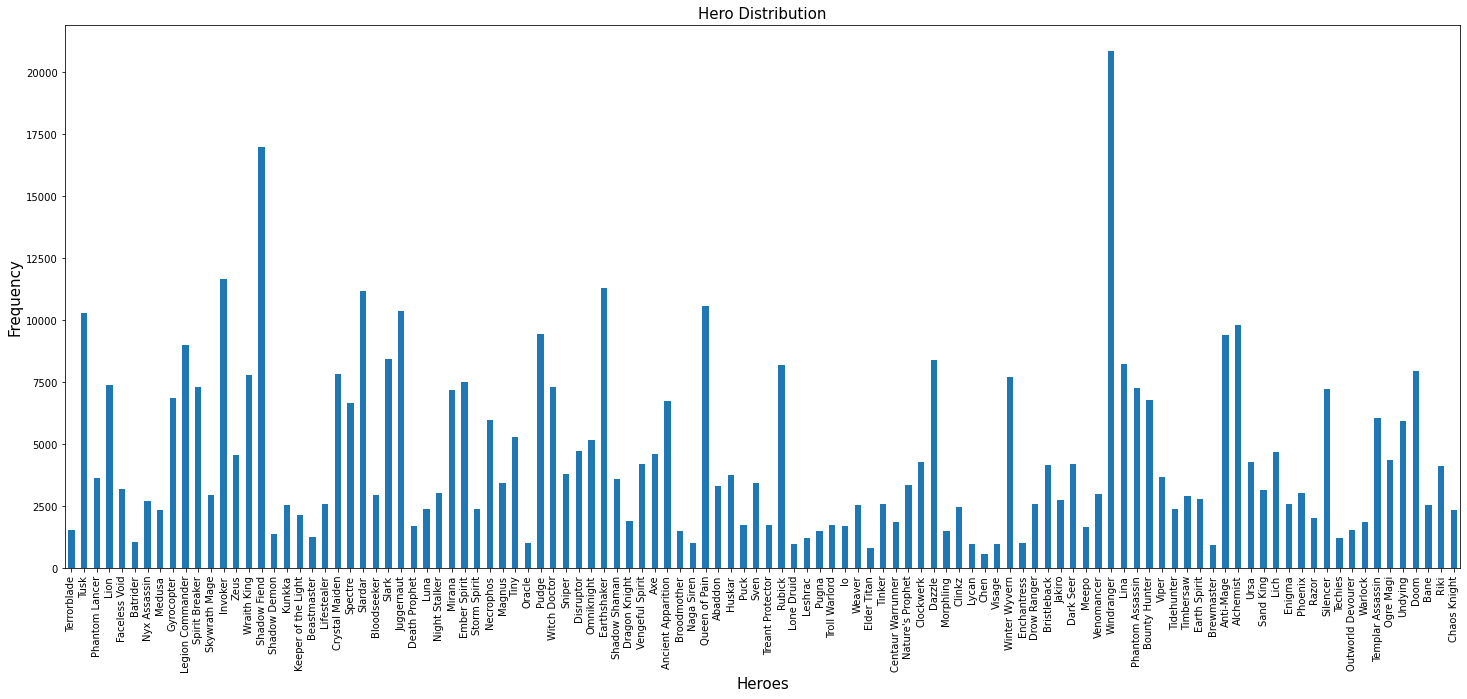

In [51]:
#Additionally, we find that the bottom 10 heroes are heroes that have complicated ability kits or have high minimum
#skill requirements. This doesn't come as a surprise - DotA is a difficult game to begin with. The addition of multiple
#units to control requires a lot of practice. 

In [ ]:
#First query to check out which account has the highest amount of total kills.

full.groupby(by = "account_id").sum().sort_values(by = "kills", ascending = False).kills.to_frame()

This doesn't give us what we want -- When player accounts are set to anonymous mode, their ID shows up as 0, crediting many unearned kills to one single account. Let's 

In [ ]:
#Let's use the pandas functionality to_frame() to convert this table to a dataframe. 

full.groupby(by = "account_id").mean().sort_values(by = "kills", ascending = False).kills.to_frame()

Looking at this stats of heroes with the most kills.

In [ ]:
full.groupby(by = "localized_name").mean().sort_values(by = "kills", ascending = False)

Heroes with the most damage - note that many of the heroes with the most kills do not have the highest amounts of damage. *But*, heroes with low damage generally also have low kills.

In [ ]:
full.groupby(by = "localized_name").mean().sort_values(by = "hero_damage", ascending = False)

Hero with the most last hits on average

In [ ]:
full.groupby(by = "localized_name").mean().sort_values(by = "last_hits", ascending = False)

Heroes with the highest gold-per-minute (GPM)

In [ ]:
full.groupby(by = "localized_name").mean().sort_values(by = "gold_per_min", ascending = False)

Number of Radiant wins

In [ ]:
rwins = len(match_results.loc[match_results.radiant_win == True])
print('{:.2f}'.format(rwins))

Number of Dire wins

In [ ]:
dwins = len(match_results.loc[match_results.radiant_win == False])
print('{:.2f}'.format(dwins))

In [ ]:
print('Do both teams have an equal number of wins? {}'.format(
    round(len(match_results.loc[match_results.radiant_win == True])/len(match_results.loc[match_results.radiant_win == False]), 1) == 1
))
print('How significant of an advantage does Radiant have? {}%'.format(
    round(len(match_results.loc[match_results.radiant_win == True])/len(match_results.loc[match_results.radiant_win == False]) - 1, 3) * 100
))

#Bar chart for number of wins of each side
y = match_results['radiant_win'].apply(lambda win: True if win else False)
classes = ['Dire Win', 'Radiant Win']
_ = pd.Series(y).apply(lambda i: classes[i]).value_counts().plot(kind = 'bar')



rwinpct = rwins/(rwins+dwins)*100
dwinpct = dwins/(rwins+dwins)*100
windiff = rwinpct - dwinpct

print ('Radiant wins', '{:.2f}'.format(rwinpct), 'percent of their games')
print('Dire wins', '{:.2f}'.format(dwinpct), 'percent of their games')
print('Difference = ''{:.2f}'.format(windiff))




In [ ]:
#Pie chart for number of wins of each side
X = [match_results.radiant_win[(match_results['radiant_win']==True)].count(),match_results.radiant_win[(match_results['radiant_win']==False)].count()]
Y = ["RadiantWin","DireWin"]
plt.pie(X, labels=Y, startangle=90, autopct='%.1f%%')
plt.show()
plt.ioff()

What could be the explanation for this difference in win percentage ( between the two sides? Some hypotheses:

1. Roshan access. Roshan is an important objective in DotA 2, and the Radiant side has easier access to the entrance of Roshan's pit.

2. Ancient camp location. The Ancient neutral camp in DotA 2 provides the highest gold and experience bounties. The location of these camps matters, and Dire's camp is farthest away from Roshan's pit. This means that anyone attacking the Ancient camp has a longer distance to run to Roshan's pit than someone at the Radiant ancient camp. 

3. Camera angle. Some argue that the camera angle in DotA 2, which is not adjustable, favors Radiant more due to it being easier for most players to move their camera up rather than down. (Radiant gameflow typically goes from bottom to top and Dire's gameflow goes from top to bottom.

In [ ]:

y = match_results['radiant_win'].apply(lambda win: True if win else False)
classes = ['Dire Win', 'Radiant Win']
_ = pd.Series(y).apply(lambda i: classes[i]).value_counts().plot(kind = 'bar')

In [ ]:
X = [match_results.radiant_win[(match_results['radiant_win']==True)].count(),match_results.radiant_win[(match_results['radiant_win']==False)].count()]
Y = ["RadiantWin","DireWin"]
plt.pie(X, labels=Y, startangle=90, autopct='%.1f%%')
plt.show()
plt.ioff()

#### Veri setinde en çok satın alınan itemlar

In [ ]:
#Most commonly purchased items.

purchases.item_name.value_counts().to_frame().head(10)

Some interesting results - there are 50,000 games in the database, but there are 551,272 boot purchases. Heroes in DotA 2 only benefit from buying one pair of boots, so there really shouldn't be more than 500,000 boots. What accounts for the other 51,272 boot purchases? It may involve buying a different pair of boots to benefit from different stats, but most likely, it's players buying Boots of Travel, the most expensive boots in the game, in the lategame. So players start off with one pair, and then once the late game comes around and players have more gold, they opt to purchase Boots of Travel. 

In [ ]:
purchases.item_name.value_counts().to_frame().tail(10)

#These least common items include unreleased items. ?

In [ ]:
fig,ax = plt.subplots(figsize=(30,20))
purchases['item_name'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Item Distribution',fontsize=15)
plt.xlabel('Items',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

Now, we will look to see if we can find and understand some correlated variables in the data. DotA has a virtually limitless supply of variables and timings to investigate, so for now let's just scratch the surface of some of the hard-coded data. 

In [ ]:
corrMatrix = games.corr()
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corrMatrix, linewidths=.5, annot=True)
plt.show()

Now, this is just a bit too much to look at. Some of the stats are obvious/unhelpful - it should be self-evident that level and xp per minute are highly correlated (after all, they are dependent :)). Let's trim some of the columns that we don't want to look at for now.

Additionally, let's cut some of the obviously dependent variables (xp per minute and level, for instance.)

asfdasfdasd not 

In [ ]:
corrMatrix = match_results.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We notice that tower_status_radiant and radiant_win are strongly correlated - As radiant's towers stay up, Radiant has a higher chance of winning. Contrapositively, Radiant has a lower chance of winning as its towers fall. Also note that tower_status_dire and radiant_win are *inversely* correlated. That is nearly self-evident - as Radiant captures Dire towers, tower_status_dire decreases, and radiant_win increases. 

Towers in DotA are extremely important for strategic purposes, but they're also a hard-coded rule for winning - at least one full lane and the throne towers of one's opponent must be destroyed in order for one'es team to win.